# PROJETO FINAL
INTRODUÇÂO AO PROCESSAMENTO DE IMAGENS


Prof. Bruno Luiggi Macchiavello Espinoza


- Lucas Corrêa Boaventura - 211038262

- Gustavo Santana Lima- 211038235

## Bibliotecas

In [388]:
import numpy as np
from PIL import Image
from IPython.display import display
import cv2
import matplotlib.pyplot as plt
from glob import glob
from skimage import img_as_float
from skimage.segmentation import morphological_geodesic_active_contour, inverse_gaussian_gradient
from skimage.draw import circle_perimeter
from skimage.segmentation import chan_vese


In [389]:
def READ(image):
    image = cv2.imread(image)
    resized_image = cv2.resize(image, (240,240), interpolation=cv2.INTER_LINEAR)
    gray = cv2.cvtColor(resized_image, cv2.COLOR_RGB2GRAY)
    return gray
    
def Blurred(image, a):
    blurred_image = cv2.GaussianBlur(image, (a, a), 0)
    return blurred_image

In [391]:
class my_DataSet():
    def __init__(self, path) -> None:
        self.__dataset = np.array([np.array(Image.open(p).resize((240, 240))) for p in glob(path)])
        self.__orig_sizes = np.array([np.array(Image.open(p).size) for p in glob(path)])
        self.__names = np.array([p.split("/")[-1] for p in glob(path)])
    
    def get(self, *i) -> np.array:
        return self.__dataset[i]
    
    def get_names(self, *i) -> np.array:
        return self.__names[i].split("\\")[-1].split(".")[0]
    
    def get_gray(self,*i) -> np.array:
        return np.array([cv2.cvtColor(arr, cv2.COLOR_RGB2GRAY) for arr in self.__dataset])[i]
    
    def show(self) -> None:
        for arr in self.__dataset:
            display(Image.fromarray(arr))

    def show_orig(self) -> None:
        for i,arr in enumerate(self.__dataset):
            display(Image.fromarray(arr).resize(self.__orig_sizes[i]))

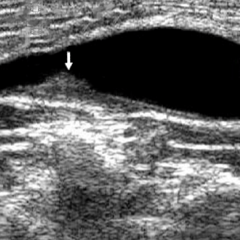

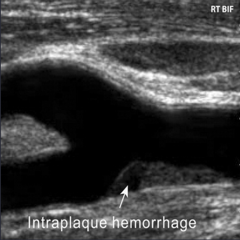

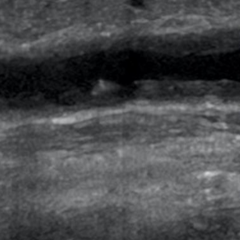

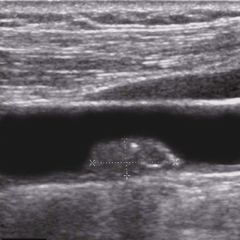

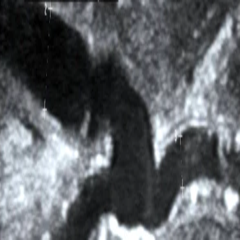

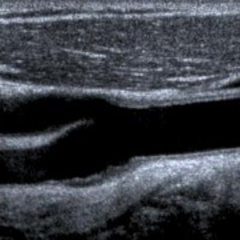

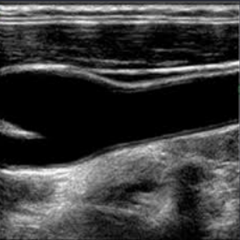

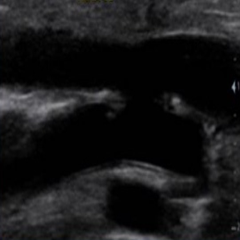

In [392]:
dataset = my_DataSet("./dataset/*")
dataset.show()

## Thresholding

### Global

Método OTSU


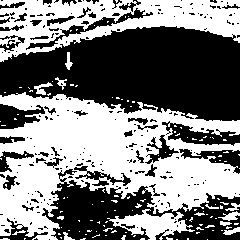

Método OTSU


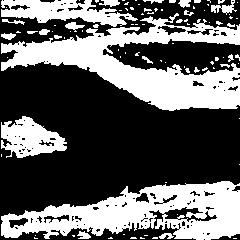

Método OTSU


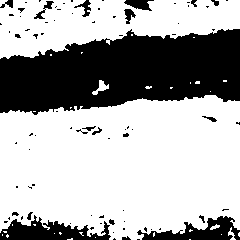

Método OTSU


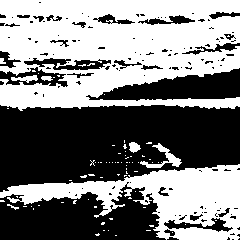

Método OTSU


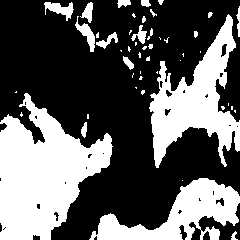

Método OTSU


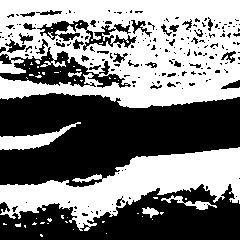

Método OTSU


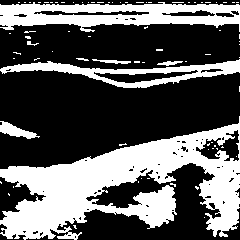

Método OTSU


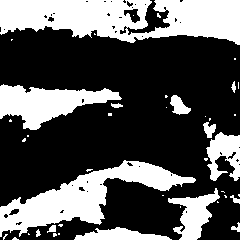

In [393]:
for gray_img in dataset.get_gray():
    _, img_bin = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    # _, img_bin_dps_filtro = cv2.threshold(img_low_filter, 0, 255, cv2.THRESH_BINARY+ cv2.THRESH_OTSU)

    print("Método OTSU")
    display(Image.fromarray(img_bin))
    # print("Método OTSU após um filtro Gaussiano")
    # Image.fromarray(img_bin_dps_filtro)

### Local

arteria_grossa


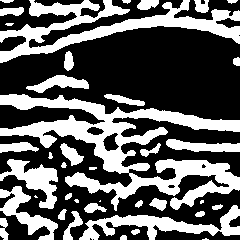

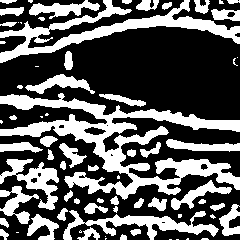

arteria_hemorrogica


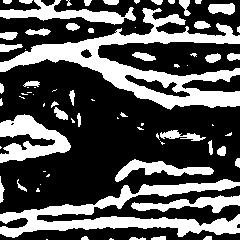

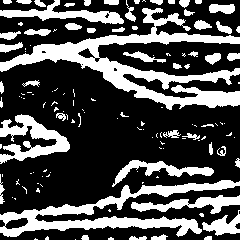

arteria_simples


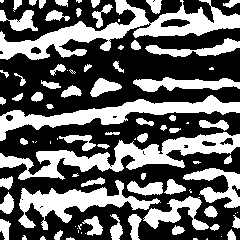

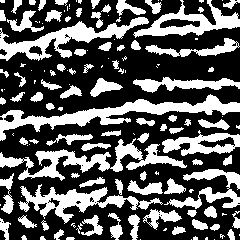

arteria2


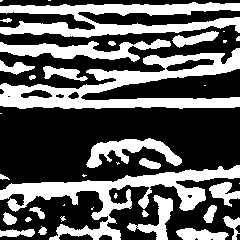

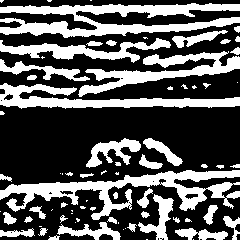

ponte_safena


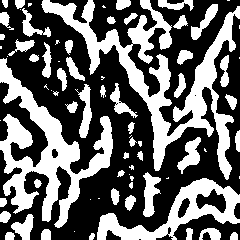

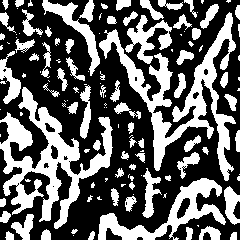

tatiana


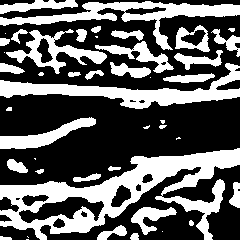

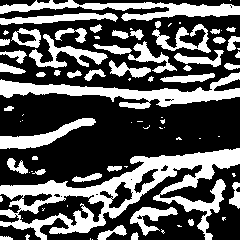

bifurcacao2


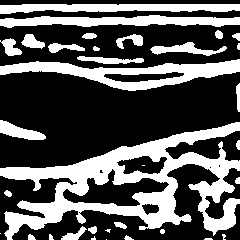

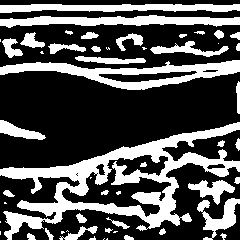

arteria_dupla


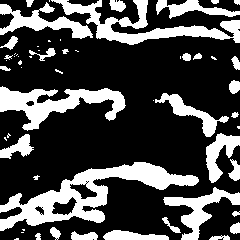

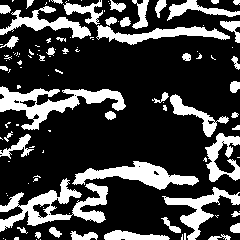

In [394]:
for i,gray_img in enumerate(dataset.get_gray()):
    blurred = cv2.GaussianBlur(gray_img, (15, 15), 0)

    thresh_mean = cv2.adaptiveThreshold(
        blurred, 
        255, 
        cv2.ADAPTIVE_THRESH_MEAN_C, 
        cv2.THRESH_BINARY , 
        19,  # Tamanho do bloco (área local)
        0    # Constante subtraída da média
    )

    # Aplicar Threshold Adaptativo - Método Gaussiano
    thresh_gaussian = cv2.adaptiveThreshold(
        blurred, 
        255, 
        cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
        cv2.THRESH_BINARY, 
        19,  # Tamanho do bloco (área local)
        0    # Constante subtraída da média ponderada
    )
    print(dataset.get_names(i))

    display(Image.fromarray(thresh_mean))
    display(Image.fromarray(thresh_gaussian))


## Baseados em contornos



In [395]:
## Função para aplicar o filtro de Sobel
def Sobel(image):
    # Convertendo para escala de cinza
    blurr = Blurred(image, 15)
    # Aplicando o filtro Sobel nas direções x e y
    sobel_x = cv2.Sobel(blurr, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(blurr, cv2.CV_64F, 0, 1, ksize=3)
    
    # Calculando a magnitude total do gradiente
    sobel_combined = np.sqrt(sobel_x**2 + sobel_y**2)
    
    # Normalizando para exibir corretamente
    sobel_combined = cv2.convertScaleAbs(sobel_combined)
    
    return sobel_combined

def Canny(image):
    edges = cv2.Canny(image, 100, 100)
    
    return edges

# Função para aplicar a detecção de bordas com Laplaciano
def LaplacianEdge(image):
    blurr = Blurred(image, 5)
    filtered_image = cv2.Laplacian(blurr, ksize=1, ddepth=cv2.CV_16S)
    filtered_image = cv2.convertScaleAbs(filtered_image)
    clahe = cv2.createCLAHE(clipLimit=7.0, tileGridSize=(8, 8))
    image_clahe = clahe.apply(filtered_image)
    
    return image_clahe
    
def post_processing(image):
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15, 15))
    
    _, binary = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    
    closing_image = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)
    opening_image = cv2.morphologyEx(closing_image, cv2.MORPH_OPEN, kernel)
    
    return opening_image


## Sobel

arteria_grossa


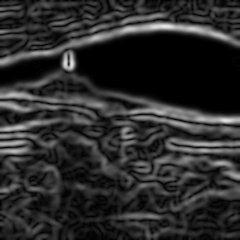

arteria_hemorrogica


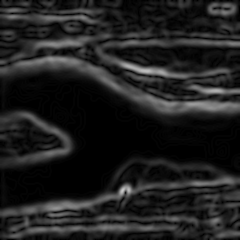

arteria_simples


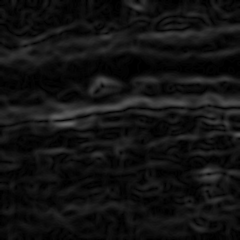

arteria2


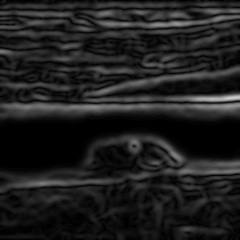

ponte_safena


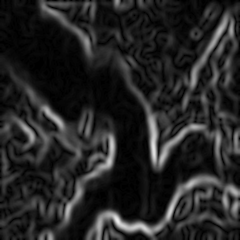

tatiana


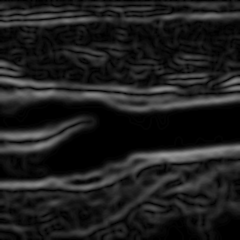

bifurcacao2


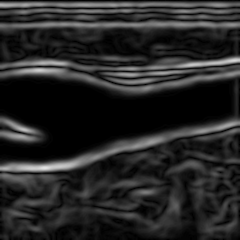

arteria_dupla


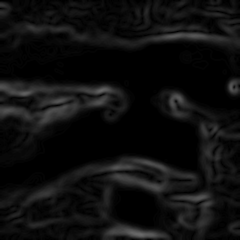

In [396]:
for i, gray_img in enumerate(dataset.get_gray()):
    sobel_image = Sobel(gray_img)
    print(dataset.get_names(i))
    display(Image.fromarray(sobel_image))
    

## Canny

arteria_grossa


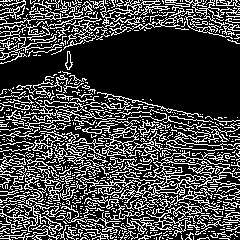

arteria_hemorrogica


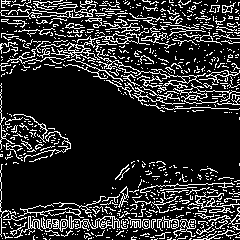

arteria_simples


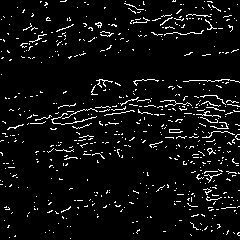

arteria2


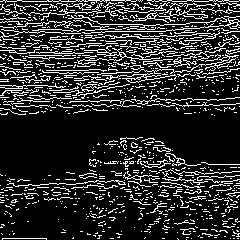

ponte_safena


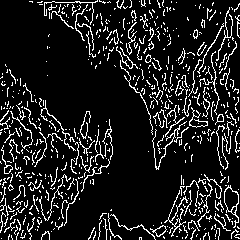

tatiana


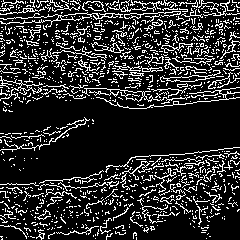

bifurcacao2


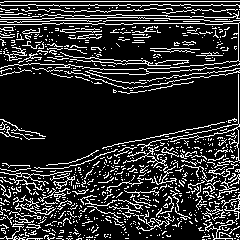

arteria_dupla


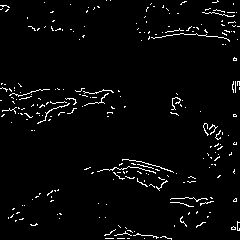

In [397]:
for i, gray_img in enumerate(dataset.get_gray()):
    canny_image = Canny(gray_img)
    print(dataset.get_names(i))
    display(Image.fromarray(canny_image))

## Laplace

arteria_grossa


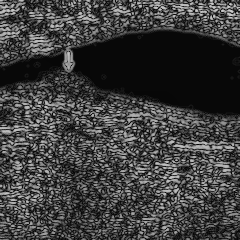

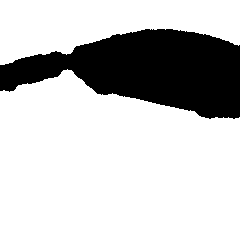

arteria_hemorrogica


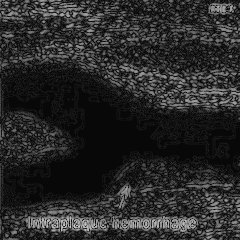

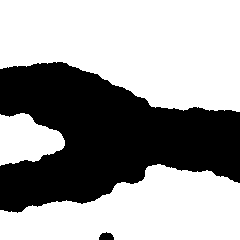

arteria_simples


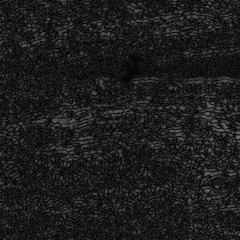

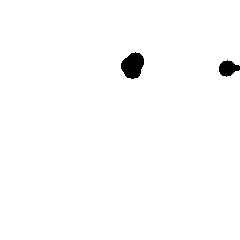

arteria2


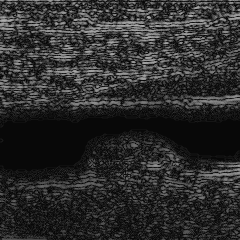

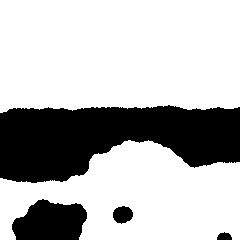

ponte_safena


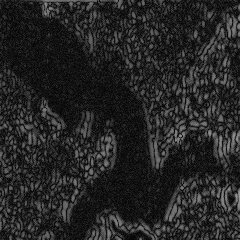

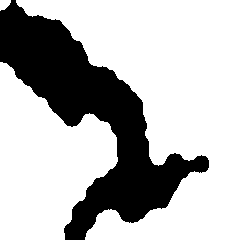

tatiana


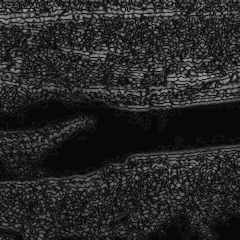

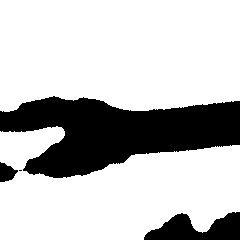

bifurcacao2


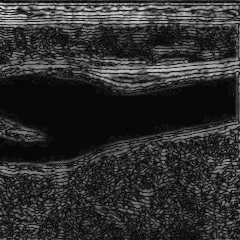

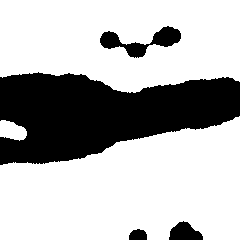

arteria_dupla


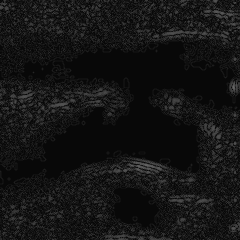

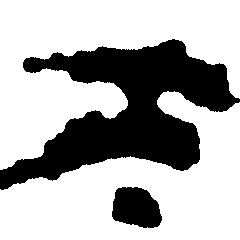

In [398]:
for i, gray_img in enumerate(dataset.get_gray()):
    laplacian_image = LaplacianEdge(gray_img)
    post_image = post_processing(laplacian_image)
    print(dataset.get_names(i))
    display(Image.fromarray(laplacian_image))
    display(Image.fromarray(post_image))
    
    

In [399]:
# Função para aplicar a detecção de bordas com Laplaciano
def LaplacianEdge(image):
    filtered_image = cv2.Laplacian(image, ksize=1, ddepth=cv2.CV_16S)
    filtered_image = cv2.convertScaleAbs(filtered_image)
    
    
    return filtered_image
    
def post_processing(image):
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))
    
    _, binary = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    closing_image = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)
    opening_image = cv2.morphologyEx(closing_image, cv2.MORPH_OPEN, kernel)
    return opening_image


## Watershed

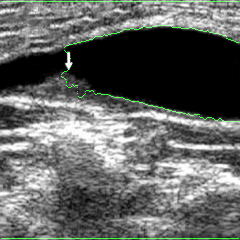

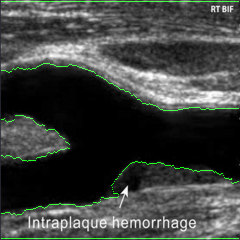

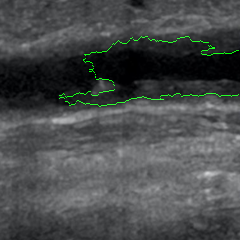

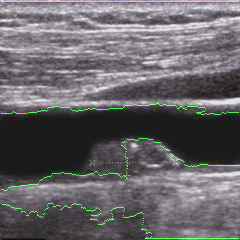

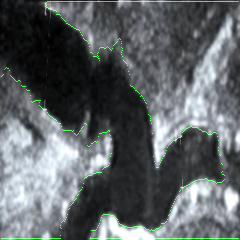

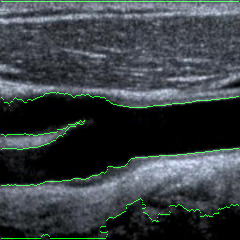

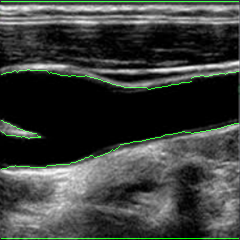

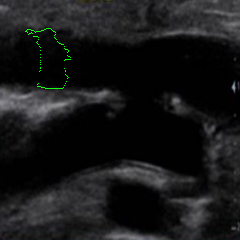

In [400]:
def kernel(shape=3) : return np.ones(shape, np.uint8)

manual_markers = [1,1,2,1,1,1,1,2]
for i, (array_orig,gray_img) in enumerate(zip(dataset.get(),dataset.get_gray())):
    # borrar e pegar threshold com OTSU
    blurred = cv2.GaussianBlur(gray_img, (15, 15), 0)
    (Image.fromarray(blurred))
    ret, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # pegar as regioes de certeza 
    sure_bg = cv2.dilate(thresh, kernel(), iterations=1)
    (Image.fromarray(sure_bg))

    opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel(), iterations=2)
    dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 0)
    _, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)
    sure_fg = np.uint8(sure_fg)
    (Image.fromarray(sure_fg))


    unknown = cv2.subtract(sure_bg, sure_fg)
    (Image.fromarray(unknown))

    _, markers = cv2.connectedComponents(sure_fg)

    markers = markers + 1
    markers[unknown == 255] = 0
    markers = cv2.watershed(array_orig, markers)




    water_fill = np.zeros(array_orig.shape, dtype=np.uint8)
    water_fill[markers == manual_markers[i]] = [0,255,0] #selecionado manualmente a label que preencheu a area requerida

    erosion = cv2.erode(water_fill, kernel())
    contour = water_fill-erosion
    (Image.fromarray(contour))


    highlighted = cv2.addWeighted(array_orig, 1, contour,1, 0)
    display(Image.fromarray(highlighted))

## Snakes


In [401]:
def snakes(image, init_level, ball, thresh):

    float_image = img_as_float(image)
    gradient = inverse_gaussian_gradient(float_image)
    init_level_set = np.zeros(image.shape, dtype=np.int8)
    rr, cc = circle_perimeter  (init_level[0], init_level[1], init_level[2])  # círculo inicial
    init_level_set[rr, cc] = 1
    
    snake = morphological_geodesic_active_contour(gradient, num_iter=160,
                                              init_level_set=init_level_set,
                                              smoothing=1, balloon=ball,
                                              threshold=thresh)
    snake = (snake * 255).astype(np.uint8)
    contours, _ = cv2.findContours(snake, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    RGB = dataset.get(i)
    RGB = RGB.copy()
    cv2.drawContours(RGB, contours, -1, (0, 255, 0), 1)
    
    return RGB

arteria_grossa


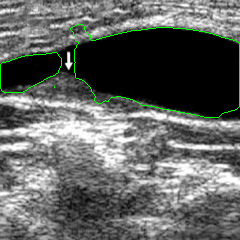

arteria_hemorrogica


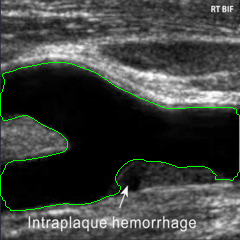

arteria_simples


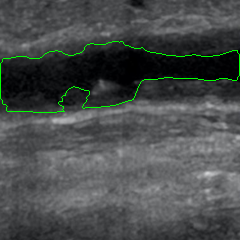

arteria2


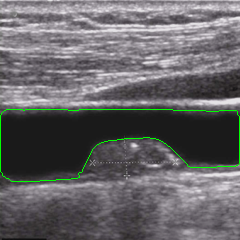

ponte_safena


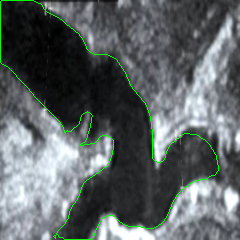

tatiana


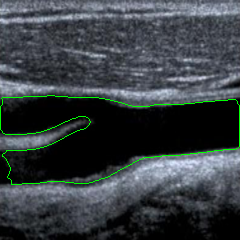

bifurcacao2


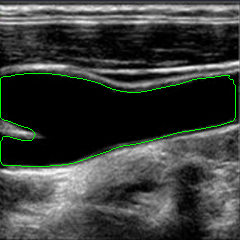

arteria_dupla


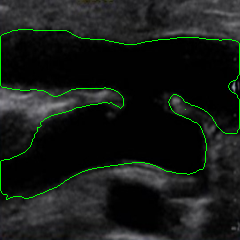

In [402]:
manual_init = [[60,75,30, 1, 0.9], [150,100,30, 1, 0.9], [70,120,30,9,8], [150,50,30, 1, 0.9], [110,100,30, 1.2, 0.9],
               [150,130,30, 1, 0.9], [110,100,30, 1, 0.9], [100,150,40, 1, 0.9]]


for i, gray_img in enumerate(dataset.get_gray()):
    snake = snakes(Blurred(gray_img, 15),manual_init[i][0:3], manual_init[i][3], manual_init[i][4])
    print(dataset.get_names(i))
    display(Image.fromarray(snake))

#simples 70,120,30,9,8
#tatiana 150,130,30, 1, 0.9
#arteria2 150,50,30, 1, 0.9
#arteria dupla 100,150,40, 1, 0.9
#arteria grossa 60,75,30, 1, 0.9
#arteria hemorrogica 150,100,30, 1, 0.9
#biburcacao2 110,100,30, 1, 0.9
#safena 110,100,30, 1.2, 0.9


## Level Set

In [403]:
def segment(image, contour):
    segmentation = chan_vese(image, mu=0.25, lambda1=1, lambda2=1, max_num_iter=100, tol=1e-3)
    segmentation_binary = (segmentation * 255).astype(np.uint8)
    contours, hierarchy = cv2.findContours(segmentation_binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    RGB = dataset.get(i)
    RGB = RGB.copy()
    cv2.drawContours(RGB, contours, contour, (0,255,0), 1)
    
    return RGB

arteria_grossa


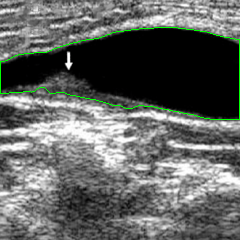

arteria_hemorrogica


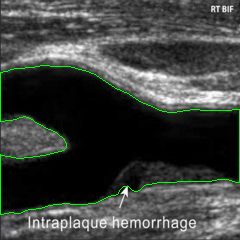

arteria_simples


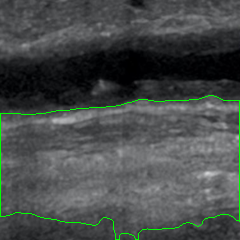

arteria2


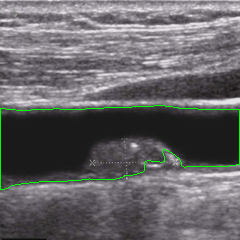

ponte_safena


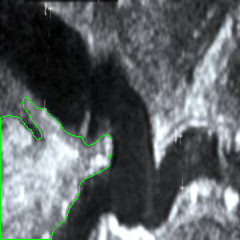

tatiana


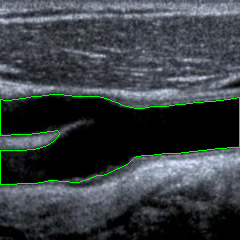

bifurcacao2


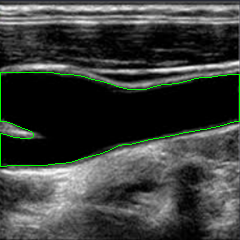

arteria_dupla


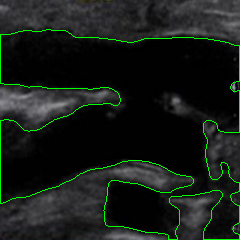

In [404]:
manual_contour = [9, 3, 0, 2, 2, 2, 6, 3]


for i, gray_img in enumerate(dataset.get_gray()):
    segmentation = segment(Blurred(gray_img, 15), manual_contour[i])
    print(dataset.get_names(i))
    display(Image.fromarray(segmentation))
